### Import necessary libraries

In [1]:
import pandas as pd
import sklearn
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

### Read Files

In [2]:
filename = 'C:/Users/hoags/Desktop/Dataset/HouseData/House-Dataset.xlsx'
df = pd.read_excel(filename)
df.shape

(21060, 16)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21060 entries, 0 to 21059
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21060 non-null  int64  
 1   date         21060 non-null  object 
 2   price        21060 non-null  int64  
 3   bedrooms     21060 non-null  int64  
 4   bathrooms    21060 non-null  float64
 5   sqft_living  21060 non-null  int64  
 6   sqft_lot     21060 non-null  int64  
 7   floors       21060 non-null  float64
 8   waterfront   21060 non-null  object 
 9   view         21060 non-null  object 
 10  condition    21060 non-null  object 
 11  grade        21060 non-null  int64  
 12  yr_built     21060 non-null  int64  
 13  zipcode      21060 non-null  int64  
 14  lat          21060 non-null  float64
 15  long         21060 non-null  float64
dtypes: float64(4), int64(8), object(4)
memory usage: 2.6+ MB


In [4]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21060 entries, 0 to 21059
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           21060 non-null  int64         
 1   date         21060 non-null  datetime64[ns]
 2   price        21060 non-null  int64         
 3   bedrooms     21060 non-null  int64         
 4   bathrooms    21060 non-null  float64       
 5   sqft_living  21060 non-null  int64         
 6   sqft_lot     21060 non-null  int64         
 7   floors       21060 non-null  float64       
 8   waterfront   21060 non-null  object        
 9   view         21060 non-null  object        
 10  condition    21060 non-null  object        
 11  grade        21060 non-null  int64         
 12  yr_built     21060 non-null  int64         
 13  zipcode      21060 non-null  int64         
 14  lat          21060 non-null  float64       
 15  long         21060 non-null  float64       
dtypes: d

In [6]:
# Check the unique value count for each column
for column in df.columns:
    unique_values_count = df[column].nunique()
    print('Number of unique value in', column, ':', unique_values_count)

Number of unique value in id : 20887
Number of unique value in date : 372
Number of unique value in price : 3748
Number of unique value in bedrooms : 8
Number of unique value in bathrooms : 26
Number of unique value in sqft_living : 942
Number of unique value in sqft_lot : 9518
Number of unique value in floors : 6
Number of unique value in waterfront : 2
Number of unique value in view : 5
Number of unique value in condition : 5
Number of unique value in grade : 11
Number of unique value in yr_built : 116
Number of unique value in zipcode : 70
Number of unique value in lat : 5026
Number of unique value in long : 752


In [7]:
# Drop columns id, lat, long
df.drop(columns = ['id', 'lat', 'long'])

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,zipcode
0,2014-10-22,1495000,4,3.25,3070,10375,2.0,No,No View,Average,10,1962,98004
1,2014-11-26,1495000,4,3.75,3770,4000,2.5,No,No View,Very Good,9,1916,98122
2,2015-01-29,1490000,4,2.50,2420,18480,1.0,No,No View,Good,9,1967,98004
3,2015-03-31,1490000,3,3.50,4560,14608,2.0,No,Average,Average,12,1990,98034
4,2014-09-11,1490000,5,3.50,3620,7821,2.0,No,Average,Average,10,1958,98040
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21055,2014-11-05,82000,3,1.00,860,10426,1.0,No,No View,Average,6,1954,98146
21056,2015-03-24,81000,2,1.00,730,9975,1.0,No,No View,Poor- Worn out,5,1943,98168
21057,2014-05-23,80000,1,0.75,430,5050,1.0,No,No View,Fair- Badly worn,4,1912,98014
21058,2014-05-06,78000,2,1.00,780,16344,1.0,No,No View,Poor- Worn out,5,1942,98168


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21060 entries, 0 to 21059
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           21060 non-null  int64         
 1   date         21060 non-null  datetime64[ns]
 2   price        21060 non-null  int64         
 3   bedrooms     21060 non-null  int64         
 4   bathrooms    21060 non-null  float64       
 5   sqft_living  21060 non-null  int64         
 6   sqft_lot     21060 non-null  int64         
 7   floors       21060 non-null  float64       
 8   waterfront   21060 non-null  object        
 9   view         21060 non-null  object        
 10  condition    21060 non-null  object        
 11  grade        21060 non-null  int64         
 12  yr_built     21060 non-null  int64         
 13  zipcode      21060 non-null  int64         
 14  lat          21060 non-null  float64       
 15  long         21060 non-null  float64       
dtypes: d

### Outlier Detection for Numerical Feature

In [9]:
def count_outliers(data, col):
    q1 = data[col].quantile(0.25, interpolation='nearest')
    q3 = data[col].quantile(0.75, interpolation='nearest')
    IQR = q3 - q1
    LLP = q1 - 1.5 * IQR
    ULP = q3 + 1.5 * IQR
    
    lower_outliers = data[data[col] < LLP][col].size
    upper_outliers = data[data[col] > ULP][col].size
    
    if lower_outliers == 0 and upper_outliers ==0:
        print("No outliers in", col)
    else:
        print("There are outliers in", col)
        print("Count of lower outliers", lower_outliers)
        print("Count of upper outliers", upper_outliers)
        
numerical_features = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'yr_built', 'zipcode']

for feature in numerical_features:
    count_outliers(df, feature)

There are outliers in price
Count of lower outliers 0
Count of upper outliers 713
There are outliers in bedrooms
Count of lower outliers 212
Count of upper outliers 280
There are outliers in bathrooms
Count of lower outliers 0
Count of upper outliers 139
There are outliers in sqft_living
Count of lower outliers 0
Count of upper outliers 383
There are outliers in sqft_lot
Count of lower outliers 0
Count of upper outliers 2312
No outliers in floors
There are outliers in grade
Count of lower outliers 275
Count of upper outliers 1230
No outliers in yr_built
No outliers in zipcode


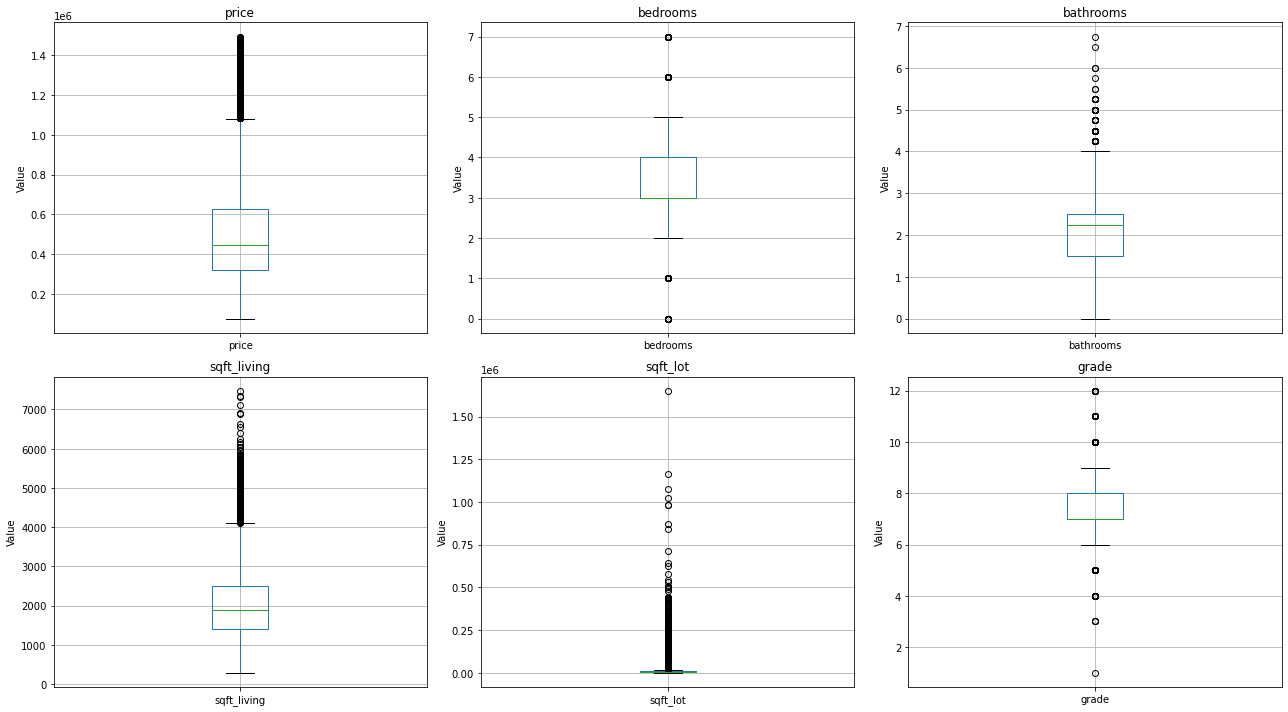

In [10]:
fig, axes = plt.subplots (nrows=2, ncols=3, figsize=(18,10))
axes = axes.flatten()

outliers_numerical = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'grade']
# Plot box plots for numerical features
for i, col in enumerate(outliers_numerical):
    ax = axes[i]
    df.boxplot(column=[col], ax=ax)
    ax.set_title(col)
    ax.set_ylabel('Value')
    
plt.tight_layout()
plt.show()

### Transformation for numerical features

In [11]:
data_transformed = df[outliers_numerical]
data_transformed.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,grade
0,1495000,4,3.25,3070,10375,10
1,1495000,4,3.75,3770,4000,9
2,1490000,4,2.50,2420,18480,9
3,1490000,3,3.50,4560,14608,12
4,1490000,5,3.50,3620,7821,10


### With log transformation

C:\Users\hoags\AppData\Local\Temp\ipykernel_5560\4075392425.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_transformed[feature] = np.log1p(data_transformed[feature])


There are outliers in price
Count of lower outliers 61
Count of upper outliers 0
There are outliers in bedrooms
Count of lower outliers 212
Count of upper outliers 280
There are outliers in bathrooms
Count of lower outliers 14
Count of upper outliers 23
There are outliers in sqft_living
Count of lower outliers 57
Count of upper outliers 19
There are outliers in sqft_lot
Count of lower outliers 988
Count of upper outliers 1566
There are outliers in grade
Count of lower outliers 275
Count of upper outliers 1230


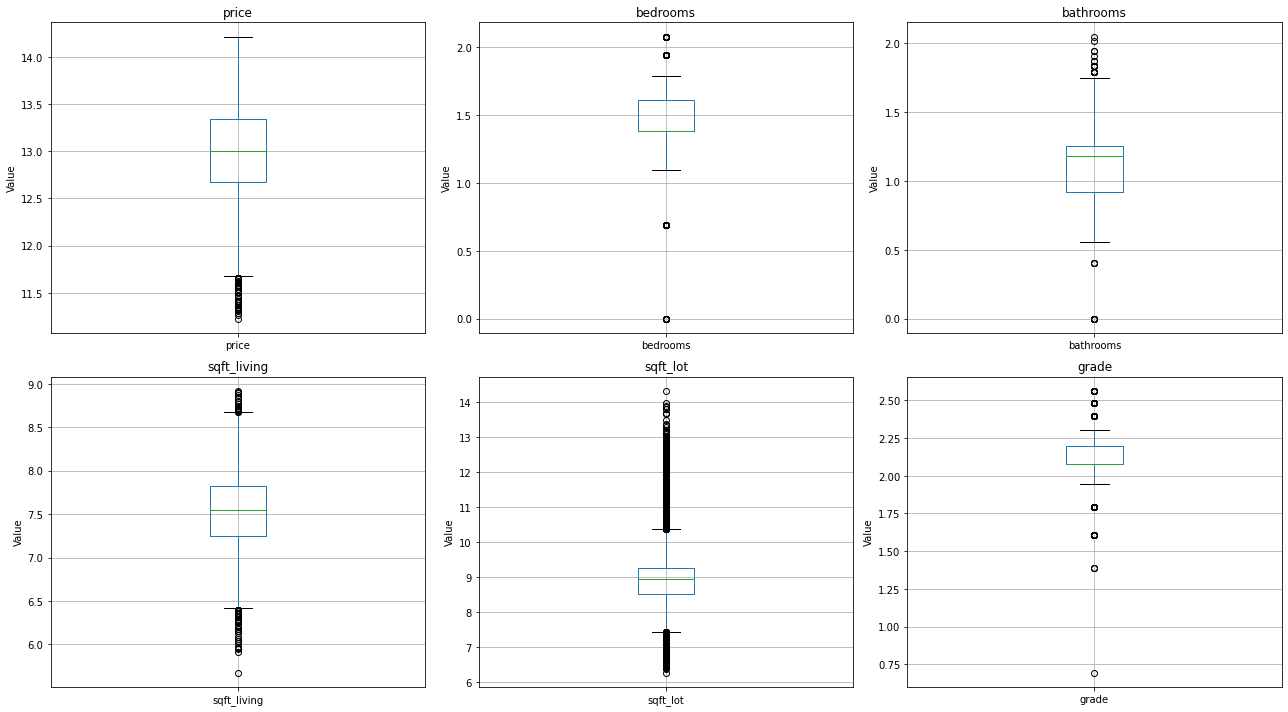

In [12]:
for feature in outliers_numerical:
    data_transformed[feature] = np.log1p(data_transformed[feature])

# Check outlier
for feature in outliers_numerical:
    count_outliers(data_transformed, feature)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18,10))
axes = axes.flatten()

# Plot box plots for numerical features
for i, col in enumerate(outliers_numerical):
    ax = axes[i]
    data_transformed.boxplot(column = [col], ax=ax)
    ax.set_title(col)
    ax.set_ylabel('Value')

plt.tight_layout()
plt.show()

In [13]:
# Rename columns
for feature in outliers_numerical:
    data_transformed[f'{feature}_log'] = np.log1p(data_transformed[feature])
data_transformed.drop(outliers_numerical, axis=1, inplace=True)
data_transformed

C:\Users\hoags\AppData\Local\Temp\ipykernel_5560\2303374318.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_transformed[f'{feature}_log'] = np.log1p(data_transformed[feature])
C:\Users\hoags\AppData\Local\Temp\ipykernel_5560\2303374318.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_transformed[f'{feature}_log'] = np.log1p(data_transformed[feature])
C:\Users\hoags\AppData\Local\Temp\ipykernel_5560\2303374318.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

,price_log,bedrooms_log,bathrooms_log,sqft_living_log,sqft_lot_log,grade_log
0,2.722455,0.959135,0.894830,2.200526,2.327009,1.223156
1,2.722455,0.959135,0.939282,2.223011,2.229401,1.194706
2,2.722235,0.959135,0.812157,2.173835,2.381812,1.194706
3,2.722235,0.869742,0.917920,2.243397,2.359853,1.271150
4,2.722235,1.026672,0.917920,2.218606,2.299048,1.223156
...,...,...,...,...,...,...
21055,2.510776,0.869742,0.526589,2.048737,2.327488,1.080418
21056,2.509779,0.741276,0.526589,2.027413,2.323166,1.026672
21057,2.508769,0.526589,0.444440,1.955310,2.254166,0.959135
21058,2.506707,0.741276,0.526589,2.036087,2.370400,1.026672


### One hot Encoding for categorical feature

In [14]:
categorical_features = ['waterfront', 'view', 'condition']
categorical_dummies = pd.get_dummies(df[categorical_features], drop_first=True)
categorical_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21060 entries, 0 to 21059
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   waterfront_Yes              21060 non-null  uint8
 1   view_Excellent              21060 non-null  uint8
 2   view_Fair                   21060 non-null  uint8
 3   view_Good                   21060 non-null  uint8
 4   view_No View                21060 non-null  uint8
 5   condition_Fair- Badly worn  21060 non-null  uint8
 6   condition_Good              21060 non-null  uint8
 7   condition_Poor- Worn out    21060 non-null  uint8
 8   condition_Very Good         21060 non-null  uint8
dtypes: uint8(9)
memory usage: 185.2 KB


### One hot Encoding for datetime feature

In [15]:
# import datetime
# import hashlib

# def encode_datetime(col):
#     # Convert the datetime object to a string
#     dt_string = col.dt.strftime('%Y-%m-%d')
    
    
#     # Hash the string
#     hash_value = [hashlib.sha256(value.encode()).hexdigest() for value in dt_string]
                                
#     # Convert the hash value to a numerical representation
#     numerical_representation = [int(hash_value, 16)/ 1e16 for hash_value in hash_value]
    
#     return numerical_representation

# datetime_encoded = encode_datetime(df['date'])
# datetime_encoded_df = pd.DataFrame(datetime_encoded, columns=["date"])
# datetime_encoded_df

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
datetime_encoded = df[['year','month','day']]
datetime_encoded

,year,month,day
0,2014,10,22
1,2014,11,26
2,2015,1,29
3,2015,3,31
4,2014,9,11
...,...,...,...
21055,2014,11,5
21056,2015,3,24
21057,2014,5,23
21058,2014,5,6


### Final Dataset

#### Concat to datafinal

In [16]:
datafinal = pd.concat([data_transformed, categorical_dummies, datetime_encoded],axis=1)

In [17]:
datafinal.columns

Index(['price_log', 'bedrooms_log', 'bathrooms_log', 'sqft_living_log',
       'sqft_lot_log', 'grade_log', 'waterfront_Yes', 'view_Excellent',
       'view_Fair', 'view_Good', 'view_No View', 'condition_Fair- Badly worn',
       'condition_Good', 'condition_Poor- Worn out', 'condition_Very Good',
       'year', 'month', 'day'],
      dtype='object')

#### View Correlation

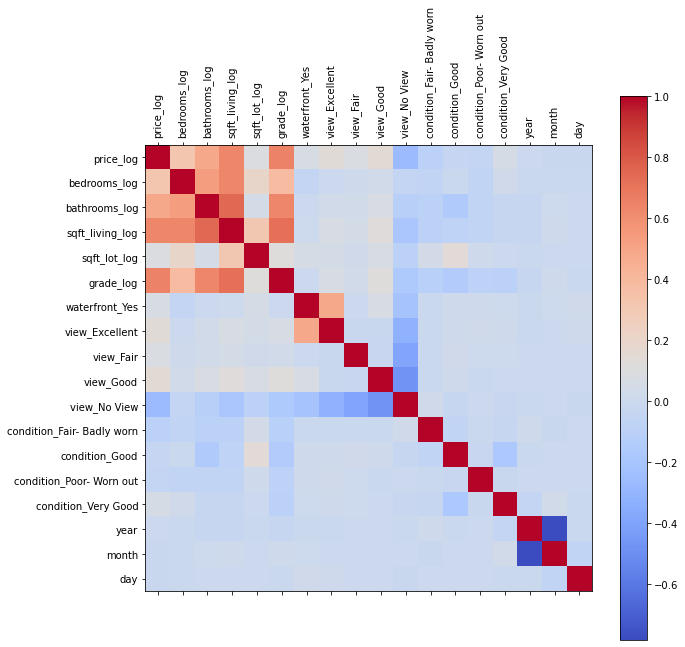

In [18]:
# Calculate correlation matrix
corr = datafinal.corr()

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10,10))

# Create a heatmap
cax = ax.matshow(corr, cmap='coolwarm')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar(cax)

### Training Model

In [19]:
# Check null values
datafinal.isnull().sum()

price_log                     0
bedrooms_log                  0
bathrooms_log                 0
sqft_living_log               0
sqft_lot_log                  0
grade_log                     0
waterfront_Yes                0
view_Excellent                0
view_Fair                     0
view_Good                     0
view_No View                  0
condition_Fair- Badly worn    0
condition_Good                0
condition_Poor- Worn out      0
condition_Very Good           0
year                          0
month                         0
day                           0
dtype: int64

#### Split to Train and Test

In [20]:
from sklearn.model_selection import train_test_split

# Feature selection
X = datafinal.drop(['price_log'], axis=1)
y = datafinal['price_log']

# Split train, test
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=42)

#### Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Mean Squared Error:", mse_lr)
print("R-squared:", r2_lr)

Mean Squared Error: 0.0005486938155256882
R-squared: 0.5189553959110034


#### Random Forest 

In [22]:
from sklearn.ensemble import RandomForestRegressor

model_rfc = RandomForestRegressor(random_state=42, n_estimators=200)
model_rfc.fit(X_train, y_train)
y_pred_rfc = model_rfc.predict(X_test)

mse_rfc = mean_squared_error(y_test, y_pred_rfc)
r2_rfc = r2_score(y_test, y_pred_rfc)

print("Mean Squared Error:", mse_rfc)
print("R-squared:", r2_rfc)


Mean Squared Error: 0.0005042231499933552
R-squared: 0.5579432122290711
